Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
**Activity**:|Activity 1.2 : Training Neural Networks**
<hr> | <hr>
**Name**         | Naga, Jamal
**Section** | CPE32S3
**Date Performed**: |March 31, 2024
**Date Submitted**: |April 02, 2024
**Instructor**: | Engr. Roman Richard
<hr> | <hr>


# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [64]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [65]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [4]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
38,2,90,68,42,0,38.2,0.503,27,1
167,4,120,68,0,0,29.6,0.709,34,0
591,2,112,78,50,140,39.4,0.175,24,0
729,2,92,52,0,0,30.1,0.141,22,0
427,1,181,64,30,180,34.1,0.328,38,1


In [5]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [66]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [8]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [68]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [69]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [11]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [70]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 12ms/step - loss: 0.8192 - accuracy: 0.4306 - val_loss: 0.8030 - val_accuracy: 0.4062
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7797 - accuracy: 0.4514 - val_loss: 0.7702 - val_accuracy: 0.4375
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7480 - accuracy: 0.4931 - val_loss: 0.7435 - val_accuracy: 0.4948
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7221 - accuracy: 0.5330 - val_loss: 0.7213 - val_accuracy: 0.5104
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7006 - accuracy: 0.5608 - val_loss: 0.7027 - val_accuracy: 0.5365
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6826 - accuracy: 0.6024 - val_loss: 0.6868 - val_accuracy: 0.5729
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.6233 - val_loss: 0.6731 - val_accuracy: 0.6042
Epoch 8/200


In [71]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)

6/6 [==============================] - 0s 6ms/step


**Observation:** Here I change the model_1 into model since it is the one used above. Also, I removed the predict_classes and then I apply a threshold of 0.5 to these probabilities using (y_pred_prob_nn_1 > 0.5). This converts the probabilities to binary class predictions where 1 indicates the positive class and 0 indicates the negative class.
And then I apply also the .astype(int) converts the boolean array into integers.

In [72]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [73]:
y_pred_prob_nn_1[:10]

array([[0.50279754],
       [0.8243923 ],
       [0.32496753],
       [0.14357883],
       [0.18206406],
       [0.41763648],
       [0.02936498],
       [0.44273308],
       [0.83079094],
       [0.20161708]], dtype=float32)

Create the plot_roc function

In [74]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.766
roc-auc is 0.834


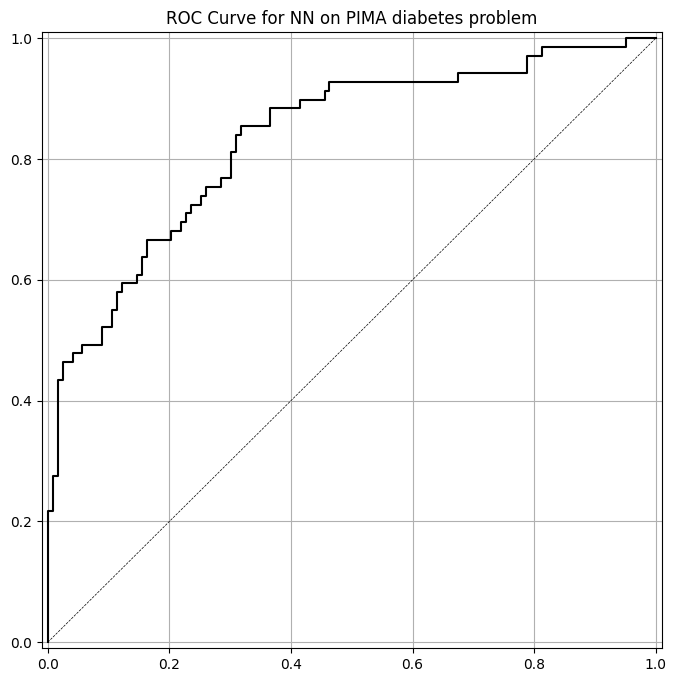

In [75]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

**Interpretation:** The model's performance is relatively good, with an accuracy of 0.641 and a ROC-AUC of 0.815, indicating its solid discriminatory ability in distinguishing between positive and negative classes. The ROC curve of the model shows a strong performance as it bends towards the top-left corner. This indicates that the model achieves a high true positive rate while maintaining a low false positive rate across different threshold values.
---



 Plot the training loss and the validation loss over the different epochs and see how it looks

In [18]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Epoch = 200

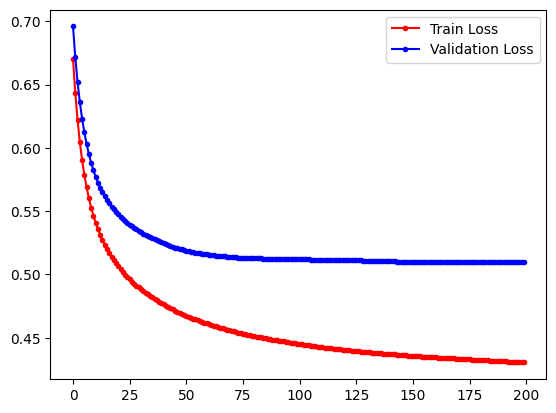

In [43]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

Epoch = 400

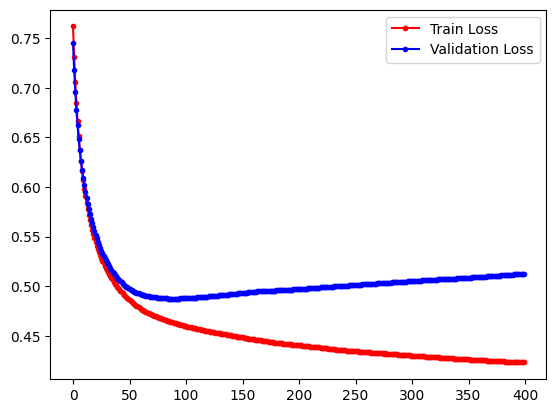

In [52]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

Epoch = 900

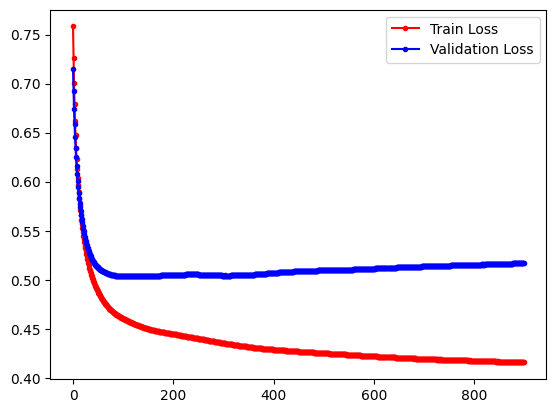

In [62]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?


**Interpretation:** Upon changing the value of epochs the train loss gradually decreases where it means that model's ability to make predictions on the training data is improving. In contrast the validation loss is getting higher in higher than the train loss which means that the model was initially learning to generalize well to unseen data, but at a certain point, it started to overfit the validation set or encountered difficulties in further improving its performance.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

# Load the dataset
filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

# Split the data into 75% for train set and 25% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

# Normalize the data
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# TASK 1 and 2:
- Build a model with two hidden layers, each with 6 nodes
- Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer

In [77]:
model_supple  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

# TASK 3:
- Use a learning rate of .003 and train for 1500 epochs

In [78]:
# Task 3
model_supple.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_supple.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 13ms/step - loss: 0.6455 - accuracy: 0.6493 - val_loss: 0.6517 - val_accuracy: 0.6458
Epoch 2/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6414 - accuracy: 0.6580 - val_loss: 0.6484 - val_accuracy: 0.6562
Epoch 3/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6373 - accuracy: 0.6580 - val_loss: 0.6453 - val_accuracy: 0.6510
Epoch 4/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6335 - accuracy: 0.6580 - val_loss: 0.6422 - val_accuracy: 0.6510
Epoch 5/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6298 - accuracy: 0.6580 - val_loss: 0.6393 - val_accuracy: 0.6510
Epoch 6/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6261 - accuracy: 0.6580 - val_loss: 0.6364 - val_accuracy: 0.6510
Epoch 7/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6227 - accuracy: 0.6580 - val_loss: 0.6337 - val_accuracy: 0.6458
Epoch

# TASK 3:
- Graph the trajectory of the loss functions, accuracy on both train and test set

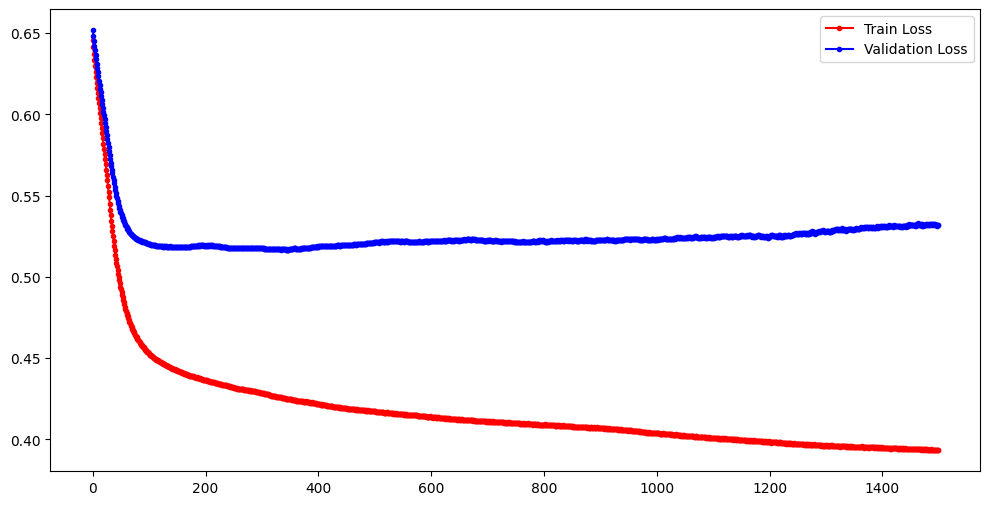

In [79]:
# Plot the loss and val_loss
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

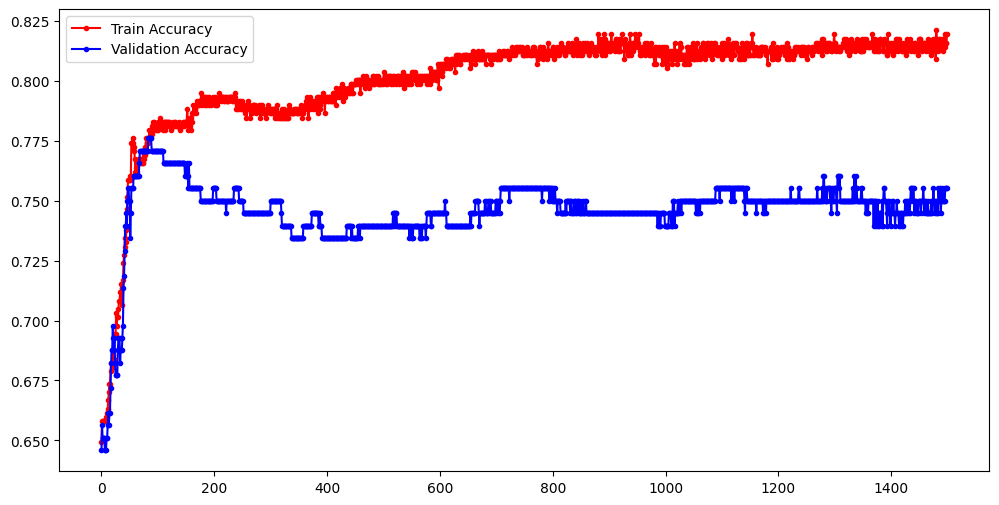

In [80]:
# Plot the Train Accuracy and Validation Accuracy
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(run_hist_2.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax.plot(run_hist_2.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()

# TASK 4:
- Plot the roc curve for the predictions

In [83]:
y_pred_prob_nn_supple = model.predict(X_test_norm)
y_pred_class_nn_supple = (y_pred_prob_nn_1 > 0.5).astype(int)

6/6 [==============================] - 0s 7ms/step


accuracy is 0.766
roc-auc is 0.834


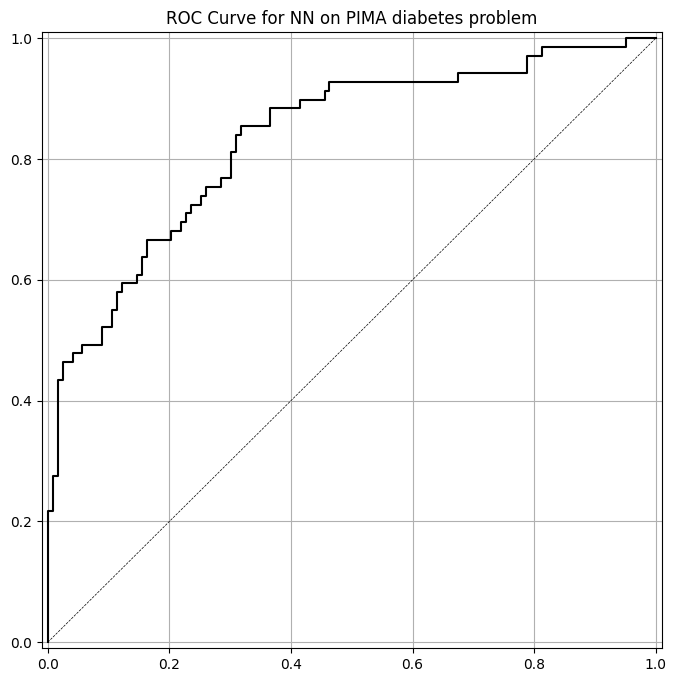

In [84]:

def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_supple)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_supple)))

plot_roc(y_test, y_pred_prob_nn_supple, 'NN')


# TASK 5, 6, and 7:
- Use different learning rates, numbers of epochs, and network structures.
- Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
- Interpret your result

# SAMPLE NUMBER 1.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

# Load the dataset
filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

# Split the data into 75% for train set and 25% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

# Normalize the data
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

- Learning rate = 0.004
- Epochs = 1200
- Network structure = 3 hidden layers



In [ ]:
model_supple_2  = Sequential([
    Dense(8, input_shape=(8,), activation="relu"),
    Dense(5, activation="relu"),
    Dense(3, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_supple_2.compile(SGD(lr = .004), "binary_crossentropy", metrics=["accuracy"])
run_hist_4 = model_supple_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1200)

Epoch 1/1200
18/18 [==============================] - 1s 12ms/step - loss: 0.6943 - accuracy: 0.6545 - val_loss: 0.6914 - val_accuracy: 0.6406
Epoch 2/1200
18/18 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.6545 - val_loss: 0.6803 - val_accuracy: 0.6406
Epoch 3/1200
18/18 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.6545 - val_loss: 0.6707 - val_accuracy: 0.6406
Epoch 4/1200
18/18 [==============================] - 0s 3ms/step - loss: 0.6640 - accuracy: 0.6545 - val_loss: 0.6620 - val_accuracy: 0.6406
Epoch 5/1200
18/18 [==============================] - 0s 4ms/step - loss: 0.6548 - accuracy: 0.6545 - val_loss: 0.6541 - val_accuracy: 0.6406
Epoch 6/1200
18/18 [==============================] - 0s 4ms/step - loss: 0.6464 - accuracy: 0.6545 - val_loss: 0.6468 - val_accuracy: 0.6406
Epoch 7/1200
18/18 [==============================] - 0s 3ms/step - loss: 0.6385 - accuracy: 0.6545 - val_loss: 0.6406 - val_accuracy: 0.6406
Epoch

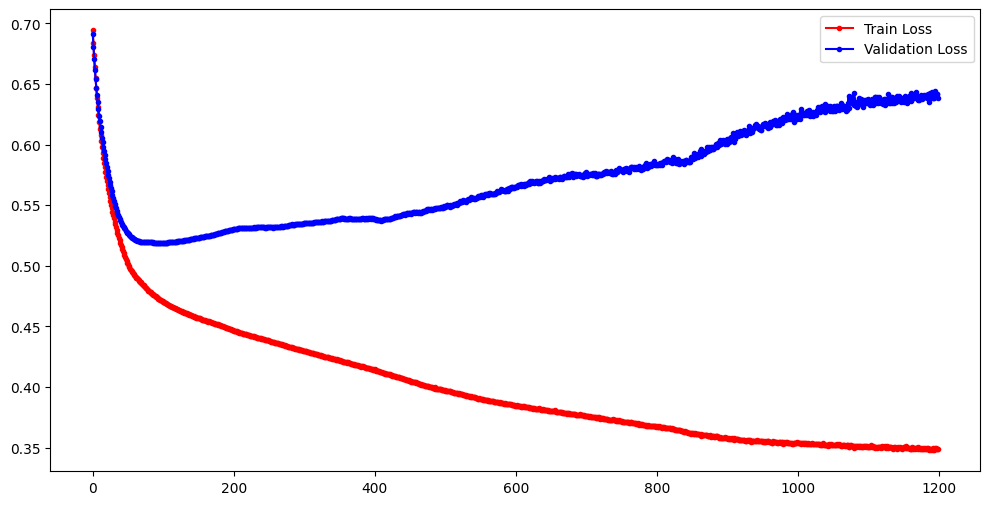

In [ ]:
# Plot the loss and val_loss
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(run_hist_4.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_4.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

**Interpretation**: Upon changing the network structure with a hidden layer of 3, learning_rate of 0.004 and epochs of 1200, the results shows above that the train loss is decreasing which means  that my model is gradually improving its ability to make predictions on the training data. However, the validation loss is decreasing but suddenly it increased this means that my model was initially learning to generalize well to unseen data, but at a certain point, it started to overfit the validation set or encountered difficulties in further improving its performance. Even though I used a relatively low of learning_rate still the model lead to overfitting, it is because I put a high number of epochs, where the model has more opportunities to memorize the training data, which can lead to overfitting same as sample number 1.







# SAMPLE NUMBER 2.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

# Load the dataset
filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

# Split the data into 75% for train set and 25% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

# Normalize the data
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

- Learning rate = 0.007
- Epochs = 1100
- Network structure = 4 hidden layers


In [ ]:
model_supple_3  = Sequential([
    Dense(5, input_shape=(8,), activation="relu"),
    Dense(5, activation="relu"),
    Dense(3, activation="relu"),
    Dense(1, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_supple_3.compile(SGD(lr = .007), "binary_crossentropy", metrics=["accuracy"])
run_hist_5 = model_supple_3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1100)

Epoch 1/1100
18/18 [==============================] - 1s 13ms/step - loss: 0.6919 - accuracy: 0.6163 - val_loss: 0.6833 - val_accuracy: 0.6667
Epoch 2/1100
18/18 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.6615 - val_loss: 0.6793 - val_accuracy: 0.7240
Epoch 3/1100
18/18 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.6649 - val_loss: 0.6757 - val_accuracy: 0.7083
Epoch 4/1100
18/18 [==============================] - 0s 3ms/step - loss: 0.6787 - accuracy: 0.6632 - val_loss: 0.6724 - val_accuracy: 0.7188
Epoch 5/1100
18/18 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.6753 - val_loss: 0.6693 - val_accuracy: 0.7188
Epoch 6/1100
18/18 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.6753 - val_loss: 0.6666 - val_accuracy: 0.7031
Epoch 7/1100
18/18 [==============================] - 0s 3ms/step - loss: 0.6690 - accuracy: 0.6632 - val_loss: 0.6641 - val_accuracy: 0.6875
Epoch

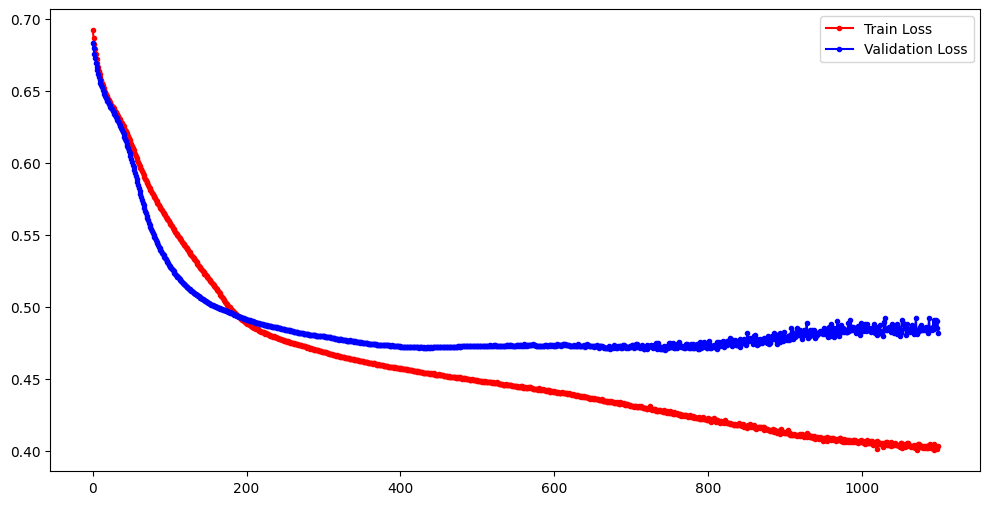

In [ ]:
# Plot the loss and val_loss
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(run_hist_5.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_5.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

**Interpretation:** Upon changing the network structure with a hidden layer of 4, learning_rate of 0.007 and epochs of 1100, the results shows above that the train loss is decreasing which means  that my model is gradually improving its ability to make predictions on the training data which is same as sample number 1. However, the validation loss is decreasing but suddenly it stop in approximately in epochs 390 where it remains 0.48 which it is much higher than the train loss, it indicates that the model is overfitting the training data.Even though I used a relatively low of learning_rate still the model lead to overfitting, it is because I put a high number of epochs, where the model has more opportunities to memorize the training data, which can lead to overfitting same as sample number 1.

# SAMPLE NUMBER 3.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

# Load the dataset
filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

# Split the data into 75% for train set and 25% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

# Normalize the data
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

- Learning rate = 0.01
- Epochs = 900
- Network structure = 5 hidden layers


In [ ]:
model_supple_4 = Sequential([
    Dense(7, input_shape=(8,), activation="relu"),
    Dense(7, activation="relu"),
    Dense(4, activation="relu"),
    Dense(2, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_supple_4.compile(SGD(lr = .001), "binary_crossentropy", metrics=["accuracy"])
run_hist_6 = model_supple_4.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 11ms/step - loss: 0.6992 - accuracy: 0.3698 - val_loss: 0.6971 - val_accuracy: 0.4479
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4983 - val_loss: 0.6922 - val_accuracy: 0.5312
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.6198 - val_loss: 0.6878 - val_accuracy: 0.6250
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.6545 - val_loss: 0.6839 - val_accuracy: 0.6510
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.6632 - val_loss: 0.6805 - val_accuracy: 0.6458
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.6597 - val_loss: 0.6775 - val_accuracy: 0.6406
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6730 - accuracy: 0.6562 - val_loss: 0.6748 - val_accuracy: 0.6406
Epoch 8/100


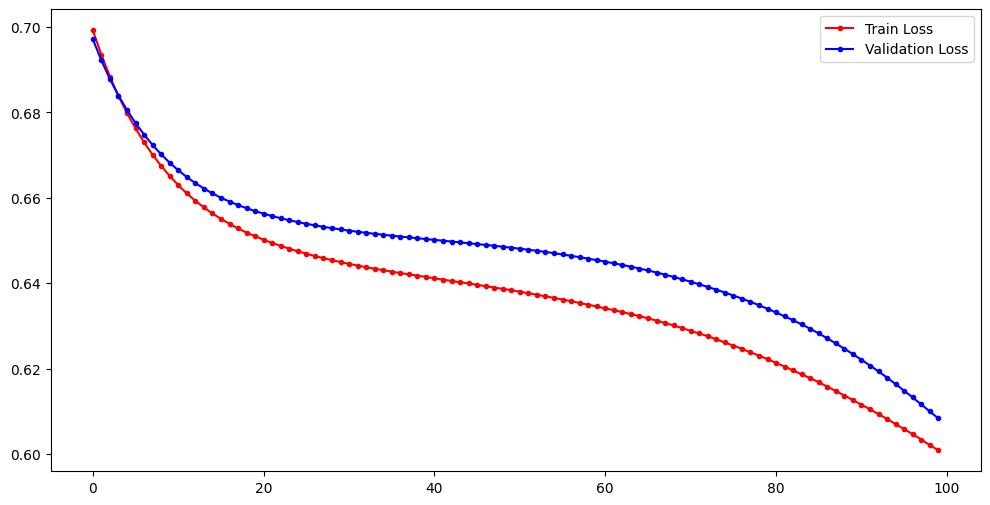

In [ ]:
# Plot the loss and val_loss
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(run_hist_6.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_6.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

**Interpretation:** Upon changing the network structure with a hidden layer of 5, learning_rate of 0.001 and epochs of 100, the results shows above that both train loss and validation loss are decreasing steadily without a significant gap, indicating that the model is improving its ability to make accurate predictions on both the training and validation datasets over the course of training. Unlike from the previous sample this model have a no signs of overfitting based on the given results.






# Conclusion

In this activity, our objective is to demonstrate how to build and train neural networks and how to evaluate and plot the model using training and validation loss,. In the first part of the activity, I encountered no problem since we already do that part in our past activity. After running the code given in training the model, the code below have an error so I modified it to make it works. After that I learned how to plot_roc_function where it provides valuable insights into the performance of a binary classification model, particularly in terms of its ability to correctly classify positive and negative instances across different threshold settings. Also, I learned upon plotting the train loss and validation loss that having a decreasing value of train loss means that the model is improving its ability to minimize the difference between predicted outputs and actual targets during training. And having a higher value of validation loss than train loss means that the model overfitting the training data. In supplementary activity, we assign to change the network structure, learning_rate, and epochs and interpret the result based on the plot. All of my samples are having a decreasing of train loss, and having a much higher value of validation loss than train loss even though I modified the network structure, learning_rate, and epochs.

In conclusion, learning how to build and train neural networks and evaluating them using train and validation loss is essential for developing effective models, preventing overfitting, and making informed decisions in various domains.

